# Breast Cancer Detection
- - Is Tumor Benign [not cancerous - just lump) or Malignant (cancerous)

In [5]:
# Step 1
import numpy as np
import pandas as pd

# viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# METRICS
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
# Step 2
df = pd.read_csv('cancer_classification.csv')

In [7]:
# Step 3
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# Step 4
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# Step 5
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
# Step 6
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


C:\Users\AMA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

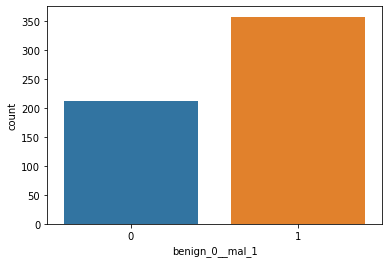

In [11]:
# Step 7
sns.countplot(df['benign_0__mal_1'])

In [12]:
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

<AxesSubplot:>

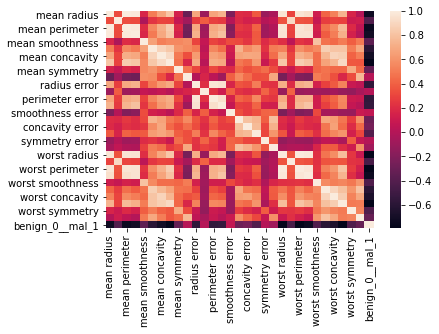

In [13]:
# Step 8
sns.heatmap(df.corr())

In [14]:
# Step 9
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

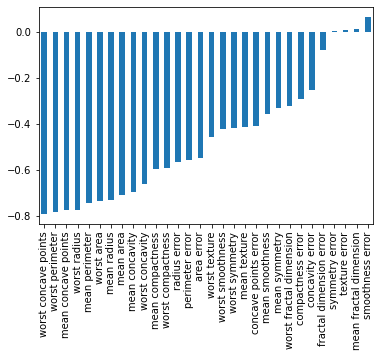

In [15]:
# Step 10
df.corr()['benign_0__mal_1'][:-1].sort_values().plot.bar()

In [16]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [17]:
# Step 11
X = df.drop('benign_0__mal_1', 1)
y= df['benign_0__mal_1']

X.shape, y.shape

((569, 30), (569,))

## Model
- Training
- Evaluation, metrics

In [18]:
# Step 12
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# Step 13 - preprocessing
#scaler = MinMaxScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [22]:
# step 13
rfc = RandomForestClassifier()
lr = LogisticRegression()

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
lr.fit(X_train, y_train)

C:\Users\AMA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evalution

In [27]:
# step 14
print(classification_report(rfc.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [31]:
print(f'Accuracy = {round(accuracy_score(rfc.predict(X_test), y_test), 2) * 100} %')

Accuracy = 97.0 %


In [32]:
confusion_matrix(rfc.predict(X_test), y_test)

array([[51,  2],
       [ 3, 87]], dtype=int64)

In [33]:
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [34]:
print(f'Logistic Regression - Accuracy = {round(accuracy_score(lr.predict(X_test), y_test), 2) * 100} %')

Logistic Regression - Accuracy = 97.0 %


## Finalizing Model
- -using Random Forest

Need to do Dimensionality Reduction - using Feature importance

In [36]:
pd.Series(rfc.feature_importances_)

0     0.048454
1     0.018487
2     0.038063
3     0.044677
4     0.009173
5     0.009544
6     0.065613
7     0.091843
8     0.003542
9     0.005657
10    0.013111
11    0.004842
12    0.010507
13    0.035493
14    0.005489
15    0.006276
16    0.006631
17    0.005880
18    0.003830
19    0.005715
20    0.107759
21    0.024672
22    0.141046
23    0.079424
24    0.011619
25    0.014747
26    0.036343
27    0.130297
28    0.016065
29    0.005199
dtype: float64

In [37]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

<AxesSubplot:>

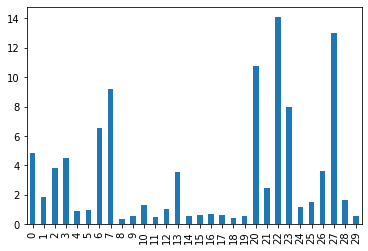

In [38]:
pd.Series(rfc.feature_importances_ * 100).plot.bar()
#plt.ylabel(list(X.columns))

In [39]:
feats = pd.DataFrame({"Features" : X.columns, "Importance" : rfc.feature_importances_ * 100})
feats

,Features,Importance
0,mean radius,4.845392
1,mean texture,1.848662
2,mean perimeter,3.806263
3,mean area,4.467678
4,mean smoothness,0.917287
5,mean compactness,0.954414
6,mean concavity,6.561303
7,mean concave points,9.184342
8,mean symmetry,0.354223
9,mean fractal dimension,0.565743


Selecting only most impportance predictors (features)

In [43]:
#final_columns = [x for x in feats['Features'] if features[]]

final_cols = []
for i in range(len(X.columns)):
    if feats['Importance'][i] >= 6: # I randomly chose 6 as criterion, after multiplying the importance by 100...
        final_cols.append(feats['Features'][i])
        
final_cols

['mean concavity',
 'mean concave points',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concave points']

<AxesSubplot:>

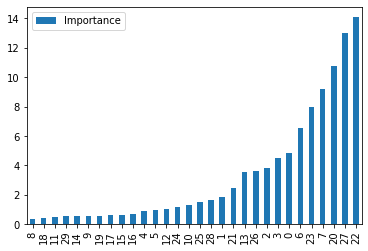

In [44]:
 feats.sort_values('Importance').plot.bar()

Retrain Model on newly selected columns only - finetune...

In [46]:
rfc.fit(X_train[final_cols], y_train)

RandomForestClassifier()

In [47]:
lr.fit(X_train[final_cols], y_train)

C:\Users\AMA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
print(classification_report(rfc.predict(X_test[final_cols]), y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [50]:
print(f'Accuracy now is : {accuracy_score(rfc.predict(X_test[final_cols]), y_test)*100}')

Accuracy now is : 96.5034965034965


In [51]:
print(f'Logistic Regression - Accuracy now is : {accuracy_score(lr.predict(X_test[final_cols]), y_test)*100}')

Logistic Regression - Accuracy now is : 95.8041958041958


Saving Model
- we can save data too, for ease of retraining, when new data is add
- we should save the final columns list for production sake
- breast_cancer_model-0.1.0.pkl' 
- 0.1 is random forest
- 0.2. is logistic regression

In [52]:
import pickle

#with open('breast_cancer_model-0.1.0.pkl', 'wb') as file:
#    pickle.dump(rfc, file)
    
with open('breast_cancer_model-0.1.1.pkl', 'wb') as file:
    pickle.dump(rfc, file)
    
with open('breast_cancer_model-0.2.0.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [53]:
X[final_cols]

,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concave points
0,0.30010,0.14710,25.380,184.60,2019.0,0.2654
1,0.08690,0.07017,24.990,158.80,1956.0,0.1860
2,0.19740,0.12790,23.570,152.50,1709.0,0.2430
3,0.24140,0.10520,14.910,98.87,567.7,0.2575
4,0.19800,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...,...
564,0.24390,0.13890,25.450,166.10,2027.0,0.2216
565,0.14400,0.09791,23.690,155.00,1731.0,0.1628
566,0.09251,0.05302,18.980,126.70,1124.0,0.1418
567,0.35140,0.15200,25.740,184.60,1821.0,0.2650


In [54]:
final_cols

['mean concavity',
 'mean concave points',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concave points']

In [56]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Testing

In [58]:
#rfc.predict([[1001, 0.3001, 0.14710, 25.38, 184.60, 2019, 0.7119, 0.2654]])
rfc.predict([[0.3001, 0.14710, 25.38, 184.60, 2019, 0.2654]])

array([0], dtype=int64)

In [59]:
cancer = {0: 'benign', 1: 'malignant'}
#cancer[rfc.predict([[1001, 0.3001, 0.14710, 25.38, 184.60, 2019, 0.7119, 0.2654]])[0]] # 0
cancer[rfc.predict([[0.3001, 0.14710, 25.38, 184.60, 2019, 0.2654]])[0]]

'benign'

In [60]:
#cancer[rfc.predict([[181, 0.0, 0.0, 0, 59.16, 268, 0.0, 0.0]])[0]] # 1

cancer[rfc.predict([[0.0, 0.0, 0, 59.16, 268, 0.0]])[0]] # 1

'malignant'